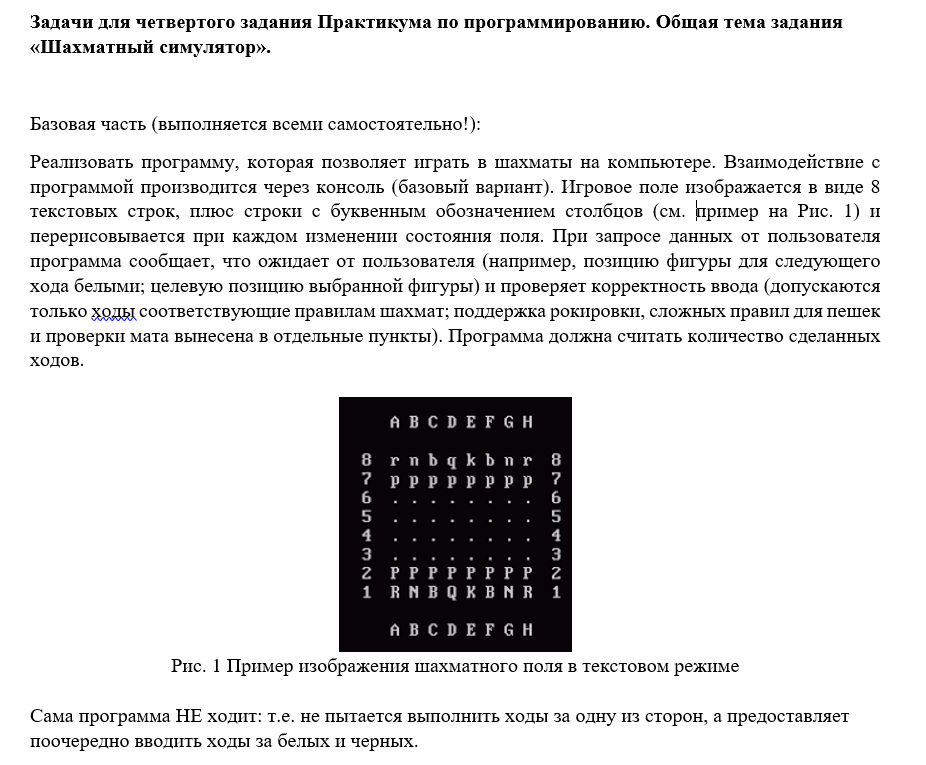

In [ ]:
class Figure:
    def __init__(self, color, first_step=True):
        self.color = color
        self.first_step = first_step
        
#Пешка
class Pawn(Figure): 
    def __str__(self):
        if self.color == 'white':
            return '♟'
        else:
            return '♙'
    def check(self, x1, y1, x2, y2, desk):
        if self.first_step: #если фигурой ходят впервые
            if self.color == 'black': #проверка для черных пешек
                if ((x2, y2) in [(x1, y1+1), (x1, y1+2)]) and (desk[y2][x2] == '.'): #условие, что сходила вперед на одну или две клетки
                    self.first_step = False 
                    return True
                elif ((desk[y2][x2] != '.') or (desk[y1+1][x1] != '.')) and ((x2, y2) in [(x1+1, y1+1), (x1-1, y1+1)]): # #условие, что срубила( по диагонали)
                    self.first_step = False
                    return True
                else:
                    return False
            else:  #проверка для черных пешeк
                if ((x2, y2) in [(x1, y1-1), (x1, y1-2)]) and (desk[y2][x2] == '.'): #условие, что сходила вперед на одну или две клетки
                    self.first_step = False
                    return True
                elif (desk[y2][x2] != '.') and ((x2, y2) in [(x1+1, y1-1), (x1-1, y1-1)]): #условие, что срубила( по диагонали)
                    self.first_step = False
                    return True
                else:
                    return False
        else: #если фигурой ходят повторно 
            if self.color == 'black': #для черных
                if ((x2, y2) in [(x1, y1+1)]) and (desk[y2][x2] == '.'): #сходила вперед на одну
                    return True
                elif (desk[y2][x2] != '.') and ((x2, y2) in [(x1+1, y1+1), (x1-1, y1+1)]): #условие, что срубила( по диагонали)
                    return True
                else:
                    return False
            else: #для белых
                if ((x2, y2) in [(x1, y1-1)]) and (desk[y2][x2] == '.'):  #сходила вперед на одну
                    return True
                elif (desk[y2][x2] != '.') and ((x2, y2) in [(x1+1, y1-1), (x1-1, y1-1)]): #условие, что срубила( по диагонали)
                    return True
                else:
                    return False

#Конь               
class Knight(Figure):
    def __str__(self):
        if self.color == 'white':
            return '♞'
        else:
            return '♘'
    def check(self, x1, y1, x2, y2, desk=None): #проверяем, что конь сходил правильно(буквой Г)
        if (x2, y2) in [(x1 + 2, y1 + 1), (x1 + 2, y1 - 1), (x1 - 2, y1 + 1), (x1 - 2, y1 - 1), (x1 + 1, y1 + 2), (x1 - 1, y1 + 2), (x1 + 1, y1 - 2), (x1 - 1, y1 - 2)]:
            return True
        else:
            return False
#Слон 
class Bishop(Figure):
    def __str__(self):
        if self.color == 'white':
            return '♝'
        else:
            return '♗'
    def check(x1, y1, x2, y2, desk=None):
        g = []
        for l in range(1, 8): #условие хода слона - к кординатам прибавляется или отнимается одна и та же величина(ходит по диагонали на n клеток)
            g.append((x1 + l, y1 + l))
            g.append((x1 - l, y1 - l))
            g.append((x1 + l, y1 - l))
            g.append((x1 - l, y1 + l))
        if (x2, y2) in g:
            if x2 > x1 and y2 > y1: 
                x1 += 1
                y1 += 1
                while x1 != x2:
                    if desk[y1][x1] != '.':
                        return False
                    x1 += 1
                    y1 += 1
                return True
            elif x2 > x1 and y2 < y1:
                x1 += 1
                y1 -= 1
                while x1 != x2:
                    if desk[y1][x1] != '.':
                        return False
                    x1 += 1
                    y1 -= 1
                return True
            elif x2 < x1 and y2 > y1:
                x1 -= 1
                y1 += 1
                while x1 != x2:
                    if desk[y1][x1] != '.':
                        return False
                    x1 -= 1
                    y1 += 1
                return True
            else:
                x1 -= 1
                y1 -= 1
                while x1 != x2:
                    if desk[y1][x1] != '.':
                        return False
                    x1 -= 1
                    y1 -= 1
                return True
        else:
            return False
    
#Ладья 
class Rook(Figure):
    def __str__(self):
        if self.color == 'white':
            return '♜'
        else:
            return '♖'
        
    def check(x1, y1, x2, y2, desk=None): #условие хода ладьи - к одной кординате прибавляется или отнимается какая-либо величина, другая - константа
        if (x1 == x2 and y1 != y2) or (x1 != x2 and y1 == y2): #(ходит по горизонтали или вертикали на n клеток)
            if x1 == x2 and y2 > y1:
                y1 += 1
                while y2 != y1:
                    if desk[y1][x1] != '.':
                        return False
                    y1 += 1
                return True
            elif x1 == x2 and y2 < y1:
                y1 -= 1
                while y2 != y1:
                    if desk[y1][x1] != '.':
                        return False
                    y1 -= 1
                return True
            elif x1 < x2 and y2 == y1:
                x1 += 1
                while x2 != x1:
                    if desk[y1][x1] != '.':
                        return False
                    x1 += 1
                return True
            else:
                x1 -= 1
                while x2 != x1:
                    if desk[y1][x1] != '.':
                        return False
                    x1 -= 1
                return True
        else:
            return False
    
#Ферзь 
class Queen(Figure):
    def __str__(self):
        if self.color == 'white':
            return '♛'
        else:
            return '♕'
    def check(self, x1, y1, x2, y2, desk=None): #условие хода ферзя - может ходить и как  ладья, и как слон
        if Rook.check(x1, y1, x2, y2, desk) or Bishop.check(x1, y1, x2, y2, desk):
            return True
        else:
            return False
#Король
class King(Figure):
    def __str__(self):
        if self.color == 'white':
            return '♚'
        else:
            return '♔'
    def check(self, x1, y1, x2, y2, desk=None): #условие хода короля - на 1 клетку около него(проверка 8 комбинаций)
        if (x2, y2) in [(x1 + 1, y1), (x1 - 1, y1), (x1, y1 + 1), (x1, y1 - 1), (x1 + 1, y1 + 1), (x1 - 1, y1 - 1), (x1 + 1, y1 - 1), (x1 - 1, y1 + 1)]:
            return True
        else:
            return False


class Chessboard:
    def __init__(self):#раставляем значки фигур
        bR1, bR2, r1, r2 = Rook('black'), Rook('black'), Rook('white'), Rook('white')
        bN1, bN2, n1, n2 = Knight('black'), Knight('black'), Knight('white'), Knight('white')
        bB1, bB2, b1, b2 = Bishop('black'), Bishop('black'), Bishop('white'), Bishop('white')
        bQ, q = Queen('black'), Queen('white')
        bK, k = King('black'), King('white')
        bP1, bP2, bP3, bP4, bP5, bP6, bP7, bP8 = Pawn('black'), Pawn('black'), Pawn('black'), Pawn('black'), Pawn('black'), Pawn('black'), Pawn('black'), Pawn('black')
        p1, p2, p3, p4, p5, p6, p7, p8 = Pawn('white'), Pawn('white'), Pawn('white'), Pawn('white'), Pawn('white'), Pawn('white'), Pawn('white'), Pawn('white')

        self.pieces = [
        [bR1, bN1, bB1, bQ, bK, bB2, bN2, bR2],
        [bP1, bP2, bP3, bP4, bP5, bP6, bP7, bP8],
        ['.', '.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.', '.'],
        [p1, p2, p3, p4, p5, p6, p7, p8],
        [r1, n1, b1, q, k, b2, n2, r2]
        ]

    def printf(self): #рисуем поле
        print('  A B C D E F G H  ')
        print()
        for i in range(len(self.pieces)):
            print(str(8 - i), end=' ')
            for j in self.pieces[i]:
                print(j, end=' ')
            print(str(i + 1))
        print()
        print('  A B C D E F G H  ')
    def change_position(self, x1, y1, x2, y2):
        if self.pieces[y2][x2] == '.':
            self.pieces[y1][x1], self.pieces[y2][x2] = '.', self.pieces[y1][x1]
            return ''
        elif self.pieces[y2][x2] in ('k', 'K'):
            return 'Шах'
        else:
            figure = self.pieces[y2][x2]
            self.pieces[y1][x1], self.pieces[y2][x2] = '.', self.pieces[y1][x1]
            return figure


In [ ]:
def standart_game():
    game1 = Chessboard()
    game1.printf()
    steps = 0
    player = {0: 'Ход белых', 1: 'Ход черных'}
    pos = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}
    while steps < 20:
        try:
            print()
            print(player[steps % 2])
            pos1, pos2 = input('Введите откуда, куда: ').split()
            x1, y1, x2, y2 = pos[pos1[0]] - 1, 8 - int(pos1[1]), pos[pos2[0]] - 1, 8 - int(pos2[1])
            
            if ((game1.pieces[y1][x1].color == 'white') and (steps % 2 != 0)) or ((game1.pieces[y1][x1].color == 'black') and (steps % 2 == 0)):
                print('Ходит другой игрок!')
                game1.printf()
                continue
            elif (0 <= x1 <= 7) and (0 <= y1 <= 7) and (game1.pieces[y1][x1] != '.') and (0 <= x2 <= 7) and (0 <= y2 <= 7):
                if game1.pieces[y1][x1].check(x1, y1, x2, y2, desk=game1.pieces):
                    if (game1.pieces[y2][x2] != '.') and (game1.pieces[y1][x1].color != game1.pieces[y2][x2].color):
                        game1.change_position(x1, y1, x2, y2)
                        game1.printf()
                        steps += 1
                    elif game1.pieces[y2][x2] == '.':
                        game1.change_position(x1, y1, x2, y2)
                        game1.printf()
                        steps += 1
                    else:
                        print('Нельзя рубить фигуры своего цвета!')
                        game1.printf()
                        continue
                else:
                    print('Так нельзя ходить!')
                    game1.printf()
                    continue
            else:
                print('Так нельзя ходить!')
                game1.printf()
                continue
        except:
            print('Так нельзя ходить!')
            game1.printf()
            continue


print(standart_game())
